# CNN application: MNIST dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import PIL
from collections import OrderedDict
import sys, os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load MNIST dataset
(train_img, train_labels), (test_img, test_labels) = datasets.mnist.load_data()

print(train_img.shape)
print(test_img.shape)
print(train_labels.shape)
print(test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# number of unique labels
print(np.unique(train_labels))
num_classes = len(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


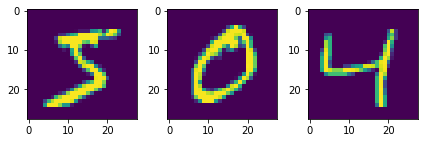

In [ ]:
# preview images using 'imshow'
fig, ax = plt.subplots(nrows = 1, ncols = 3)
for i in range(3):
  ax[i].imshow(train_img[i])

plt.tight_layout()
plt.show()

In [ ]:
train_img = train_img.reshape((60000, 28, 28, 1))
test_img = test_img.reshape((10000, 28, 28, 1))

In [ ]:
# standardization of images
train_img, test_img = train_img/255, test_img/255

In [ ]:
# one-hot encoding labels
train_labels = to_categorical(train_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

## SImple CNN + Dropout Layer

In [ ]:
# 모델링 결과 plot 함수
def plot_results(accuracy, val_accuracy, loss, val_loss):
  plt.figure(figsize = (6, 4))
  ax1 = plt.subplot(1, 2, 1)
  epochs_range = range(1, 6)
  sns.lineplot(epochs_range, accuracy, label = 'Train accuracy', color = 'green', marker = 'o')
  sns.lineplot(epochs_range, val_accuracy, label = 'Test accuracy', color = 'red', marker = '^')
  plt.title('Accuracy', fontsize = 15)
  plt.xticks([1, 2, 3, 4, 5])
  plt.xlabel('Epoch')

  plt.subplot(1, 2, 2)
  sns.lineplot(epochs_range, loss, label = 'Train loss', color = 'green', marker = 'o')
  sns.lineplot(epochs_range, val_loss, label = 'Test loss', color = 'red', marker = '^')
  plt.title('Loss', fontsize = 15)
  plt.xticks([1, 2, 3, 4, 5])
  plt.xlabel('Epoch')

  plt.tight_layout()
  plt.show()

In [ ]:
# create layers
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), verbose = 1)
model.evaluate(test_img, test_labels)

Epoch 1/5
1875/1875 [==============================] - 233s 124ms/step - loss: 0.2661 - accuracy: 0.9140 - val_loss: 0.0310 - val_accuracy: 0.9901
Epoch 2/5
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0392 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0262 - val_accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.0301 - val_accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 0.0193 - accuracy: 0.9938


[0.019299587234854698, 0.9937999844551086]

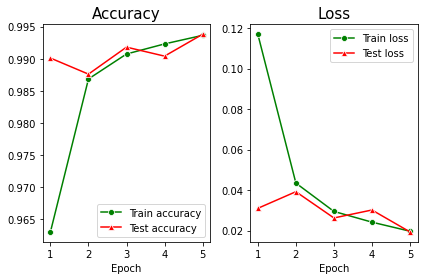

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plot_results(accuracy, val_accuracy, loss, val_loss)

## Batch
Batch size list to test: 64, 128, 256, 512, 1024

In [ ]:
# create layers
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), batch_size = 64, verbose = 1)

Epoch 1/5
938/938 [==============================] - 246s 262ms/step - loss: 0.3091 - accuracy: 0.8982 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 2/5
938/938 [==============================] - 247s 263ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0410 - val_accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 246s 262ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 245s 261ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0252 - val_accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 245s 262ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0260 - val_accuracy: 0.9924


In [ ]:
history1 = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), batch_size = 128, verbose = 1)

Epoch 1/5
469/469 [==============================] - 237s 504ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0183 - val_accuracy: 0.9944
Epoch 2/5
469/469 [==============================] - 236s 502ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0232 - val_accuracy: 0.9934
Epoch 3/5
469/469 [==============================] - 235s 502ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0244 - val_accuracy: 0.9937
Epoch 4/5
469/469 [==============================] - 236s 502ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0209 - val_accuracy: 0.9940
Epoch 5/5
469/469 [==============================] - 236s 503ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0241 - val_accuracy: 0.9936


In [ ]:
history2 = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), batch_size = 256, verbose = 1)

Epoch 1/5
235/235 [==============================] - 231s 981ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0239 - val_accuracy: 0.9941
Epoch 2/5
235/235 [==============================] - 229s 977ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0228 - val_accuracy: 0.9947
Epoch 3/5
235/235 [==============================] - 230s 977ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0235 - val_accuracy: 0.9943
Epoch 4/5
235/235 [==============================] - 229s 974ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0244 - val_accuracy: 0.9945
Epoch 5/5
235/235 [==============================] - 230s 980ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0304 - val_accuracy: 0.9940


In [ ]:
history3 = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), batch_size = 512, verbose = 1)

Epoch 1/5
118/118 [==============================] - 227s 2s/step - loss: 8.7097e-04 - accuracy: 0.9998 - val_loss: 0.0275 - val_accuracy: 0.9942
Epoch 2/5
118/118 [==============================] - 226s 2s/step - loss: 5.4416e-04 - accuracy: 0.9998 - val_loss: 0.0309 - val_accuracy: 0.9941
Epoch 3/5
118/118 [==============================] - 226s 2s/step - loss: 4.1461e-04 - accuracy: 0.9998 - val_loss: 0.0289 - val_accuracy: 0.9951
Epoch 4/5
118/118 [==============================] - 226s 2s/step - loss: 4.6016e-04 - accuracy: 0.9998 - val_loss: 0.0315 - val_accuracy: 0.9947
Epoch 5/5
118/118 [==============================] - 225s 2s/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0277 - val_accuracy: 0.9944


In [ ]:
history4 = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), batch_size = 1024, verbose = 1)

Epoch 1/5
59/59 [==============================] - 225s 4s/step - loss: 6.9938e-04 - accuracy: 0.9998 - val_loss: 0.0255 - val_accuracy: 0.9944
Epoch 2/5
59/59 [==============================] - 222s 4s/step - loss: 2.7471e-04 - accuracy: 0.9999 - val_loss: 0.0281 - val_accuracy: 0.9945
Epoch 3/5
59/59 [==============================] - 222s 4s/step - loss: 2.0319e-04 - accuracy: 0.9999 - val_loss: 0.0297 - val_accuracy: 0.9945
Epoch 4/5
59/59 [==============================] - 222s 4s/step - loss: 2.7883e-04 - accuracy: 0.9999 - val_loss: 0.0279 - val_accuracy: 0.9951
Epoch 5/5
59/59 [==============================] - 222s 4s/step - loss: 2.3679e-04 - accuracy: 0.9999 - val_loss: 0.0294 - val_accuracy: 0.9952


In [ ]:
# define results variables
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

accuracy3 = history3.history['accuracy']
val_accuracy3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

accuracy4 = history4.history['accuracy']
val_accuracy4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

### Plot Result

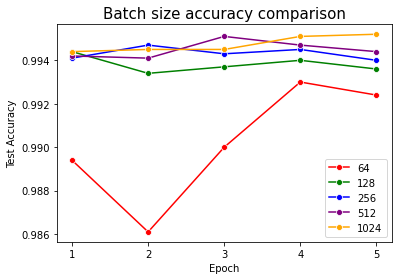

In [ ]:
ax = plt.subplot(1, 1, 1)
sns.lineplot(range(1, 6), val_accuracy, label = '64', color = 'red', marker = 'o')
sns.lineplot(range(1, 6), val_accuracy1, label = '128', color = 'green', marker = 'o')
sns.lineplot(range(1, 6), val_accuracy2, label = '256', color = 'blue', marker = 'o')
sns.lineplot(range(1, 6), val_accuracy3, label = '512', color = 'purple', marker = 'o')
sns.lineplot(range(1, 6), val_accuracy4, label = '1024', color = 'orange', marker = 'o')
plt.title('Batch size accuracy comparison', fontsize = 15)
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')

plt.show()